# RNN Sine Wave

### Overview
Predict a simple sine wave using RNN

Adopted with thanks from [here](https://www.datatechnotes.com/2018/12/rnn-example-with-keras-simplernn-in.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

# number formats
pd.options.display.float_format = '{:,.4f}'.format
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

## Generate some data

In [2]:
# Generate 1000 samples
samples = 1000    
training_samples = 800    

t=np.arange(0,samples)

## Generating a sine wave, with some noise 
x=np.sin(0.02*t)+2*np.random.rand(samples)

## print data
df_orig = pd.DataFrame(x)
df_orig


,0
0,1.7389
1,0.8447
2,1.8159
3,2.0066
4,1.2887
...,...
995,1.0784
996,1.7513
997,2.4331
998,2.1245


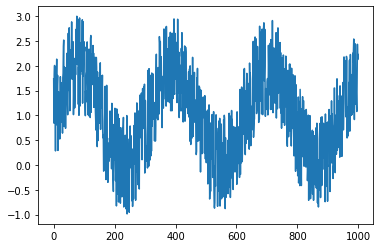

In [3]:
## plot data
plt.plot(df_orig)
plt.show() 

## Train / Test split

In [4]:
## Create train / test values

values=df_orig.values
train,test = values[0:training_samples,:], values[training_samples:samples,:]

print ("values:" , values[1:20])
print ('train size', len(train))
print ('test size', len(test))

values: [[ 0.8447]
 [ 1.8159]
 [ 2.0066]
 [ 1.2887]
 [ 1.3688]
 [ 0.2846]
 [ 1.9745]
 [ 0.8086]
 [ 1.8054]
 [ 2.1342]
 [ 1.1864]
 [ 1.6203]
 [ 1.8056]
 [ 0.2940]
 [ 0.4303]
 [ 1.4742]
 [ 0.6626]
 [ 1.3275]
 [ 1.1657]]
train size 800
test size 200


In [5]:
## padding the data
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

print ("train size", len(train))
print ("test size", len(test))

train size 804
test size 204


In [6]:
## see some data
## compare with original data
train[:30]

array([ 1.7389,  0.8447,  1.8159,  2.0066,  1.2887,  1.3688,  0.2846,
        1.9745,  0.8086,  1.8054,  2.1342,  1.1864,  1.6203,  1.8056,
        0.2940,  0.4303,  1.4742,  0.6626,  1.3275,  1.1657,  0.5245,
        0.8568,  1.7796,  0.9046,  1.6615,  0.8674,  1.5417,  1.4486,
        1.0060,  0.6436])

In [7]:
## vectorize the data

def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

x_train,y_train =convertToMatrix(train,step)
x_test,y_test =convertToMatrix(test,step)

print ("x_train.shape", x_train.shape)
print ("y_train.shape", y_train.shape)
print ("x_test.shape", x_test.shape)
print ("y_test.shape", y_test.shape)

x_train.shape (800, 4)
y_train.shape (800,)
x_test.shape (200, 4)
y_test.shape (200,)


In [8]:
## See data
df = pd.DataFrame(x_train, y_train)
df

,0,1,2,3
1.2887,1.7389,0.8447,1.8159,2.0066
1.3688,0.8447,1.8159,2.0066,1.2887
0.2846,1.8159,2.0066,1.2887,1.3688
1.9745,2.0066,1.2887,1.3688,0.2846
0.8086,1.2887,1.3688,0.2846,1.9745
...,...,...,...,...
0.4627,1.6202,-0.0579,1.0820,0.9332
0.4627,-0.0579,1.0820,0.9332,0.4627
0.4627,1.0820,0.9332,0.4627,0.4627
0.4627,0.9332,0.4627,0.4627,0.4627


In [9]:
## Finally, we'll reshape trainX and testX to fit with the Keras model. 
## RNN model requires three-dimensional input data.

x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print ("x_train.shape", x_train.shape)
print ("y_train.shape", y_train.shape)
print ("x_test.shape", x_test.shape)
print ("y_test.shape", y_test.shape)

x_train.shape (800, 1, 4)
y_train.shape (800,)
x_test.shape (200, 1, 4)
y_test.shape (200,)


## Build RNN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1184      
_________________________________________________________________
dense (Dense)                (None, 8)                 264       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


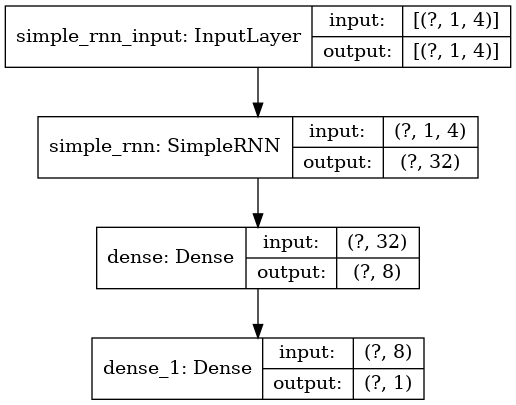

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(keras.layers.Dense(8, activation="relu")) 
model.add(keras.layers.Dense(1))
model.compile(optimizer='rmsprop', loss = 'mse', metrics=['mse'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Setup Tensorboard

In [11]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'rnn-sine'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/rnn-sine/09-39-34


## Train

In [12]:
%%time

print ("training starting ...")

# Fitting the RNN to the Training set
history = model.fit(x_train, y_train, epochs=100, batch_size=16,
                   callbacks = [tensorboard_callback])

print ("training done.")

training starting ...
Epoch 1/100
50/50 [==============================] - 0s 7ms/step - loss: 1.1069 - mse: 1.1069
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4239 - mse: 0.4239
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4113 - mse: 0.4113
Epoch 4/100
50/50 [==============================] - 0s 5ms/step - loss: 0.4060 - mse: 0.4060
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4063 - mse: 0.4063
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4057 - mse: 0.4057
Epoch 7/100
50/50 [==============================] - 0s 4ms/step - loss: 0.4028 - mse: 0.4028
Epoch 8/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4034 - mse: 0.4034
Epoch 9/100
50/50 [==============================] - 0s 6ms/step - loss: 0.4012 - mse: 0.4012
Epoch 10/100
50/50 [==============================] - 1s 12ms/step - loss: 0.4003 - mse: 0.4003
Epoch 11/100
50/50 [================

## Training History

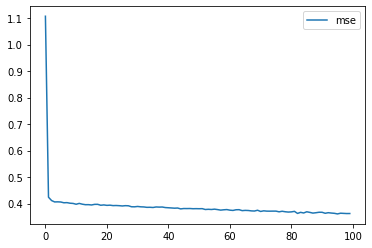

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['mse'], label='mse')
plt.legend()
plt.show()

## Prediction

In [14]:
predict_train = model.predict(x_train)
predict_test= model.predict(x_test)

predicted=np.concatenate((predict_train,predict_test),axis=0)

print (predicted[:10])


[[ 1.3861]
 [ 1.2599]
 [ 1.5985]
 [ 1.0020]
 [ 1.1400]
 [ 0.9679]
 [ 1.3486]
 [ 1.4798]
 [ 1.2920]
 [ 1.5944]]


## Evaluate

In [15]:
train_score = model.evaluate(x_train, y_train, verbose=0)
test_score = model.evaluate(x_test, y_test, verbose=0)

print ("train_score", train_score)
print ("test_score", test_score)

train_score [0.3637678921222687, 0.3637678921222687]
test_score [0.40003570914268494, 0.40003570914268494]


In [16]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

train_metrics = model.evaluate(x_train, y_train, verbose=0)
for idx, metric in enumerate(metric_names):
    print ("Train Metric : {} = {:,.2f}".format (metric_names[idx], train_metrics[idx]))
    
test_metrics = model.evaluate(x_test, y_test, verbose=0)
for idx, metric in enumerate(metric_names):
    print ("Test Metric : {} = {:,.2f}".format (metric_names[idx], test_metrics[idx]))

model metrics :  ['loss', 'mse']
Train Metric : loss = 0.36
Train Metric : mse = 0.36
Test Metric : loss = 0.40
Test Metric : mse = 0.40


## Plot

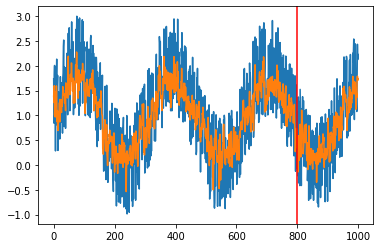

In [17]:
index = df_orig.index.values
plt.plot(index,df_orig)
plt.plot(index,predicted)
plt.axvline(df_orig.index[training_samples], c="r")
plt.show()